In [1]:
import os
import chemprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
import shap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

E:\Anaconda\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/mordred_1586_all.csv')
df

,PCE_max(%),ABC_acceptor,ABCGG_acceptor,nAcid_acceptor,nBase_acceptor,SpAbs_A_acceptor,SpMax_A_acceptor,SpDiam_A_acceptor,SpAD_A_acceptor,SpMAD_A_acceptor,...,SRW10_donor,TSRW10_donor,MW_donor,AMW_donor,WPath_donor,WPol_donor,Zagreb1_donor,Zagreb2_donor,mZagreb1_donor,mZagreb2_donor
0,6.93,58.097941,40.410316,0,0,99.467327,2.631228,5.073304,99.467327,1.326231,...,10.866528,108.616580,786.328023,7.084036,11282,86,268,321,18.000000,12.027778
1,3.09,58.097941,40.410316,0,0,99.467327,2.631228,5.073304,99.467327,1.326231,...,10.866528,108.616580,786.328023,7.084036,11282,86,268,321,18.000000,12.027778
2,8.33,82.274821,52.682889,0,0,139.585627,2.769425,5.342543,139.585627,1.342169,...,11.281636,136.985730,1131.510776,7.071942,32662,125,408,489,23.138889,17.388889
3,8.67,68.678783,46.494859,0,0,115.449721,2.708776,5.190384,115.449721,1.311929,...,11.450720,154.380658,1390.512098,7.475871,56543,151,492,584,25.611111,21.222222
4,8.46,82.274821,52.682889,0,0,139.585627,2.769425,5.342543,139.585627,1.342169,...,11.123093,120.909423,986.235691,8.018176,17497,106,332,403,21.166667,13.972222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,18.16,101.000010,67.229851,0,0,170.115355,2.746929,5.323745,170.115355,1.308580,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889
1582,10.70,79.948567,55.806323,0,0,134.270366,2.749301,5.245009,134.270366,1.303596,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889
1583,17.31,82.375644,57.591622,0,0,137.065638,2.752945,5.249094,137.065638,1.293072,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889
1584,17.81,95.504916,63.384238,0,0,161.382940,2.742219,5.296299,161.382940,1.301475,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889


In [3]:
X = df.iloc[:, 1:]
Y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [4]:
scaler=StandardScaler()

In [5]:
scaler.fit(X_train)

StandardScaler()

In [6]:
X_train_stand = scaler.transform(X_train) 
X_test_stand = scaler.transform(X_test) 

In [7]:
Y

0        6.93
1        3.09
2        8.33
3        8.67
4        8.46
        ...  
1581    18.16
1582    10.70
1583    17.31
1584    17.81
1585    18.77
Name: PCE_max(%), Length: 1586, dtype: float64

In [8]:
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr

In [9]:
import pickle
with open('../model/rf_Mordred_1586.pkl', 'rb') as f:
    regressor = pickle.load(f)

In [10]:
regressor.fit(X_train_stand, y_train)
y_train_hat = regressor.predict(X_train_stand)
y_test_hat = regressor.predict(X_test_stand)

In [11]:
#np.savetxt('y_train_Mordred.csv', y_train)
#np.savetxt('y_test_Mordred.csv', y_test)
#np.savetxt('y_train_hat_Mordred.csv', y_train_hat)
#np.savetxt('y_test_hat_Mordred.csv', y_test_hat)

In [12]:
model=regressor

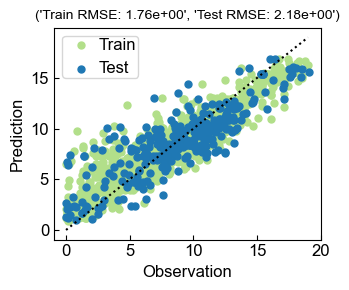

In [13]:
fontsize = 12
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
#plt.xticks([0, 0.6, 1.2, 1.8])
# plt.yticks([0, 0.6, 1.2, 1.8])
plt.tick_params(direction='in')
#plt.text(450,80,'Scaled',family="Arial",fontsize=fontsize)
#plt.xlim([0,2]) 
#plt.ylim([0,2])
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
               'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=10)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.savefig('../result/Mordred_RF.jpg', dpi = 2048)
#plt.savefig('20191213_RF_withPTEAI_1.png', dpi = 1200)
plt.show()

In [14]:
PearsonCoefficient(y_test,y_test_hat)

0.8502857982596583

In [15]:
R2Score(y_test,y_test_hat)

0.7193194476205169

In [16]:
explainer = shap.TreeExplainer(model)
shap_explainer = explainer(X)
shap_values = explainer.shap_values(X)
shap_explainer.data=shap_explainer.data[0]
shap_explainer.values=shap_explainer.values[0]

In [17]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 36  
plt.rcParams['figure.figsize'] = [4,6]
plt.rcParams['figure.dpi']= 300
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

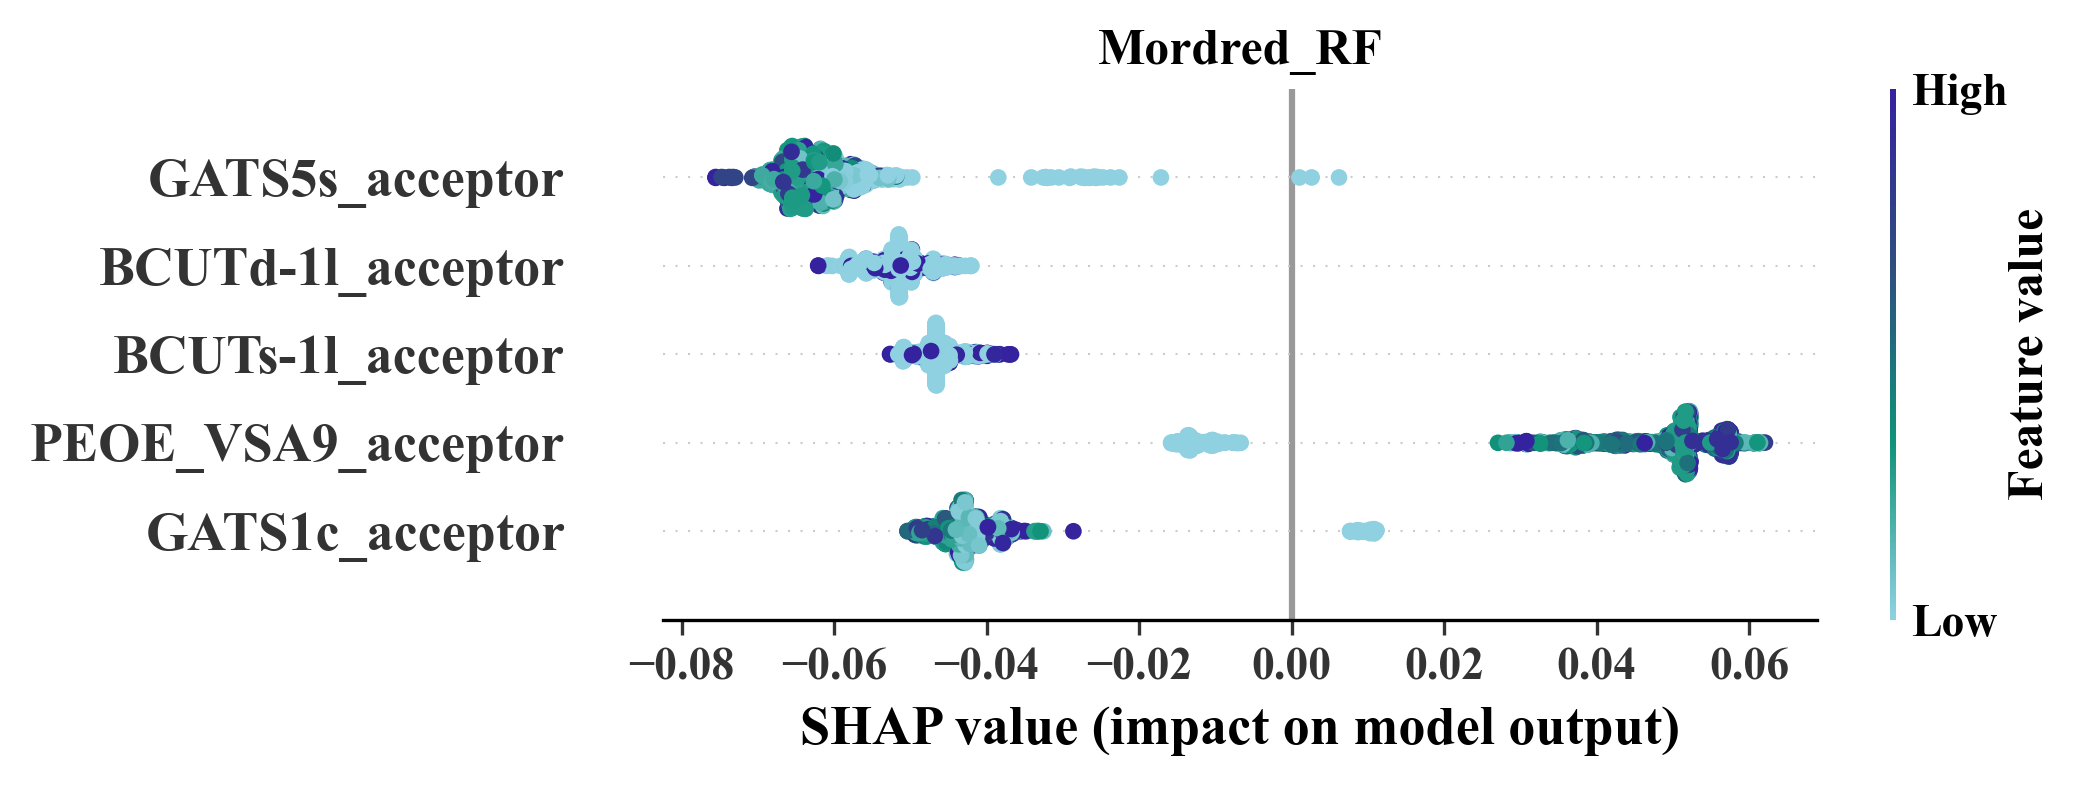

In [18]:
shap.initjs()

color01 = (143,209,225)
color02 = (15,147,121)
color03 = (46,78,126)
color04 = (53,34,159)


colors = [tuple([x / 255 for x in color]) for color in [color01, color02, color03, color04]]


gradient_colors = [colors[0], colors[1], colors[2], colors[3]]



n = 256
newcolors = []
for color in gradient_colors:
    rgba_color = cm.colors.to_rgba(color)
    newcolors.append(rgba_color)

newcmp = cm.colors.LinearSegmentedColormap.from_list('BlueYellow', newcolors, N=n)


plt.figure()

shap.summary_plot(shap_values, X, max_display=5, show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)

plt.title(('Mordred_RF'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_Mordred_RF_1.tif',dpi = 300)


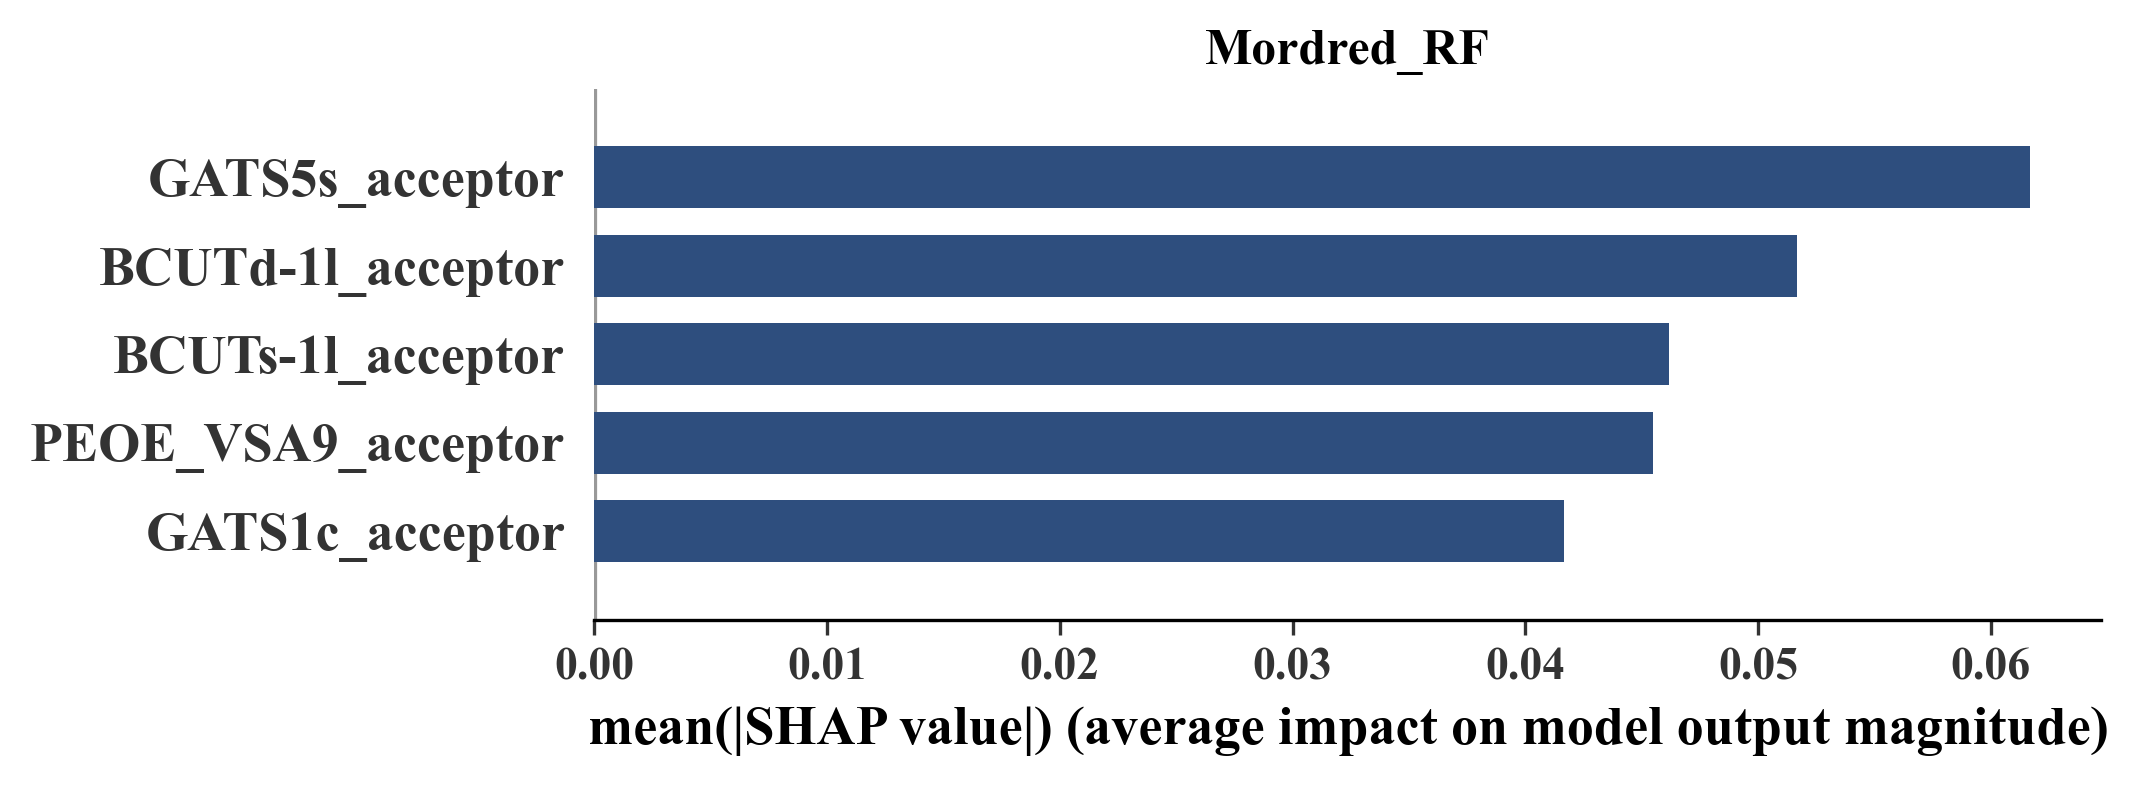

In [19]:

shap.summary_plot(shap_values,X, plot_type="bar",show=False,color="#2e4e7e",max_display=5)


plt.title(('Mordred_RF'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_Mordred_RF_2.tif',dpi = 300)